In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("final.csv")

In [5]:
df

,Unnamed: 0,Season,Name,Transfer Sum,From,FromCountry,FromLanguage,FromLanguageFamily,To,ToCountry,ToLanguage,ToLanguageFamily
0,0,Zugänge 20/21,Arthur Cabral,"4,40 Mio. €",Palmeiras,Brazil,Portuguese,Romance,FC Basel 1893,Switzerland,German,Germanic
1,1,Zugänge 20/21,Kaly Sene,"4,00 Mio. €",Juventus U19,Italy,Italian,Romance,FC Basel 1893,Switzerland,German,Germanic
2,2,Zugänge 20/21,Edon Zhegrova,"3,00 Mio. €",KRC Genk,Belgium,French,Romance,FC Basel 1893,Switzerland,German,Germanic
3,3,Zugänge 20/21,Andrea Padula,450 Tsd. €,FC Wil 1900,Switzerland,German,Germanic,FC Basel 1893,Switzerland,German,Germanic
4,4,Zugänge 20/21,Heinz Lindner,ablösefrei,Wehen Wiesbaden,Germany,German,Germanic,FC Basel 1893,Switzerland,German,Germanic
...,...,...,...,...,...,...,...,...,...,...,...,...
4365,4365,Abgänge 11/12,Palmiro Di Dio,-,FC Lugano,Switzerland,Italian,Romance,FC Lugano U21,Switzerland,Italian,Romance
4366,4366,Abgänge 11/12,Patrice Feussi,-,FC Lugano,Switzerland,Italian,Romance,Vereinslos,Vereinslos,Vereinslos,Vereinslos
4367,4367,Abgänge 11/12,Rijat Shala,-,FC Lugano,Switzerland,Italian,Romance,Vereinslos,Vereinslos,Vereinslos,Vereinslos
4368,4368,Abgänge 11/12,Fabio Liverani,-,FC Lugano,Switzerland,Italian,Romance,Karriereende,Karriereende,Karriereende,Karriereende


In [6]:
df_nodes = df[['From','To']]
df_nodes

,From,To
0,Palmeiras,FC Basel 1893
1,Juventus U19,FC Basel 1893
2,KRC Genk,FC Basel 1893
3,FC Wil 1900,FC Basel 1893
4,Wehen Wiesbaden,FC Basel 1893
...,...,...
4365,FC Lugano,FC Lugano U21
4366,FC Lugano,Vereinslos
4367,FC Lugano,Vereinslos
4368,FC Lugano,Karriereende


In [7]:
ids = []
clubs = []
for i , club in enumerate(pd.concat([df['To'],df['From']]).unique()):
    ids.append(i)
    clubs.append(club)
    
df_club_id_from = pd.DataFrame({'id_From': ids, 'From':clubs})    
df_club_id_to = pd.DataFrame({'id_To': ids, 'To':clubs})
df_club_id_from
    


,id_From,From
0,0,FC Basel 1893
1,1,Hertha BSC
2,2,Montpellier
3,3,Bröndby IF
4,4,CD Leganés
...,...,...
899,899,ES Zarzis
900,900,Brescia
901,901,Pergolettese
902,902,Giulianova


In [8]:
df_club_id_to

,id_To,To
0,0,FC Basel 1893
1,1,Hertha BSC
2,2,Montpellier
3,3,Bröndby IF
4,4,CD Leganés
...,...,...
899,899,ES Zarzis
900,900,Brescia
901,901,Pergolettese
902,902,Giulianova


In [9]:
df_temp = pd.merge(df, df_club_id_from , how = 'inner', on='From')

In [10]:
df_temp = pd.merge(df_temp, df_club_id_to , how = 'inner', on='To')

In [11]:
df_temp

,Unnamed: 0,Season,Name,Transfer Sum,From,FromCountry,FromLanguage,FromLanguageFamily,To,ToCountry,ToLanguage,ToLanguageFamily,id_From,id_To
0,0,Zugänge 20/21,Arthur Cabral,"4,40 Mio. €",Palmeiras,Brazil,Portuguese,Romance,FC Basel 1893,Switzerland,German,Germanic,617,0
1,1,Zugänge 20/21,Kaly Sene,"4,00 Mio. €",Juventus U19,Italy,Italian,Romance,FC Basel 1893,Switzerland,German,Germanic,188,0
2,2,Zugänge 20/21,Edon Zhegrova,"3,00 Mio. €",KRC Genk,Belgium,French,Romance,FC Basel 1893,Switzerland,German,Germanic,52,0
3,57,Zugänge 18/19,Edon Zhegrova,Leihe,KRC Genk,Belgium,French,Romance,FC Basel 1893,Switzerland,German,Germanic,52,0
4,3,Zugänge 20/21,Andrea Padula,450 Tsd. €,FC Wil 1900,Switzerland,German,Germanic,FC Basel 1893,Switzerland,German,Germanic,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,3113,Abgänge 12/13,Gaël N'Lundulu,ablösefrei,FC Lausanne-Sport,Switzerland,French,Romance,Chern. Burgas,Bulgaria,Bulgarian,Slavic,459,492
4366,3117,Abgänge 12/13,Thierno Bah,?,FC Lausanne-Sport,Switzerland,French,Romance,Al-Taawon,Saudi Arabia,Arabic,Semitic,459,493
4367,3118,Abgänge 12/13,Nélson Borges,?,FC Lausanne-Sport,Switzerland,French,Romance,FC Prilly,Switzerland,French,Romance,459,494
4368,3120,Abgänge 12/13,Aadil Assana,Leih-Ende,FC Lausanne-Sport,Switzerland,French,Romance,AS Monaco,France,French,Romance,459,495


In [12]:
df_id = df_temp[['id_From','id_To']]
df_id

,id_From,id_To
0,617,0
1,188,0
2,52,0
3,52,0
4,21,0
...,...,...
4365,459,492
4366,459,493
4367,459,494
4368,459,495


In [14]:
df_id.to_string("final.txt", encoding="utf-8-sig", header = None, index = None )
df_txt = df_id

In [15]:
G = nx.Graph()
G = nx.DiGraph()
G = nx.MultiGraph()
G = nx.MultiDiGraph()

In [16]:
network =  nx.DiGraph()

In [19]:
g = nx.from_pandas_edgelist(df_temp, 
                            source = 'From',
                            target = 'To',
                            edge_attr = None,
                            create_using = nx.Graph())


In [24]:
df_tempZ20 = df.loc[df['Season'] == 'Zugänge 20/21']
df_tempZ19 = df.loc[df['Season'] == 'Zugänge 19/20']
df_tempZ18 = df.loc[df['Season'] == 'Zugänge 18/19']
df_tempZ17 = df.loc[df['Season'] == 'Zugänge 17/18']
df_tempZ16 = df.loc[df['Season'] == 'Zugänge 16/17']
df_tempZ15 = df.loc[df['Season'] == 'Zugänge 15/16']
df_tempZ14 = df.loc[df['Season'] == 'Zugänge 14/15']
df_tempZ13 = df.loc[df['Season'] == 'Zugänge 13/14']
df_tempZ12 = df.loc[df['Season'] == 'Zugänge 12/13']
df_tempZ11 = df.loc[df['Season'] == 'Zugänge 11/12']
df_tempA20 = df.loc[df['Season'] == 'Abgänge 20/21']
df_tempA19 = df.loc[df['Season'] == 'Abgänge 19/20']
df_tempA18 = df.loc[df['Season'] == 'Abgänge 18/19']
df_tempA17 = df.loc[df['Season'] == 'Abgänge 17/18']
df_tempA16 = df.loc[df['Season'] == 'Abgänge 16/17']
df_tempA15 = df.loc[df['Season'] == 'Abgänge 15/16']
df_tempA14 = df.loc[df['Season'] == 'Abgänge 14/15']
df_tempA13 = df.loc[df['Season'] == 'Abgänge 13/14']
df_tempA12 = df.loc[df['Season'] == 'Abgänge 12/13']
df_tempA11 = df.loc[df['Season'] == 'Abgänge 11/12']
df_tempZ20

,Unnamed: 0,Season,Name,Transfer Sum,From,FromCountry,FromLanguage,FromLanguageFamily,To,ToCountry,ToLanguage,ToLanguageFamily
0,0,Zugänge 20/21,Arthur Cabral,"4,40 Mio. €",Palmeiras,Brazil,Portuguese,Romance,FC Basel 1893,Switzerland,German,Germanic
1,1,Zugänge 20/21,Kaly Sene,"4,00 Mio. €",Juventus U19,Italy,Italian,Romance,FC Basel 1893,Switzerland,German,Germanic
2,2,Zugänge 20/21,Edon Zhegrova,"3,00 Mio. €",KRC Genk,Belgium,French,Romance,FC Basel 1893,Switzerland,German,Germanic
3,3,Zugänge 20/21,Andrea Padula,450 Tsd. €,FC Wil 1900,Switzerland,German,Germanic,FC Basel 1893,Switzerland,German,Germanic
4,4,Zugänge 20/21,Heinz Lindner,ablösefrei,Wehen Wiesbaden,Germany,German,Germanic,FC Basel 1893,Switzerland,German,Germanic
...,...,...,...,...,...,...,...,...,...,...,...,...
3990,3990,Zugänge 20/21,Marcis Oss,Leihe,Spartaks,Russia,Russian,Slavic,FC Lugano,Switzerland,Italian,Romance
3991,3991,Zugänge 20/21,Jens Odgaard,Leihe,US Sassuolo,Italy,Italian,Romance,FC Lugano,Switzerland,Italian,Romance
3992,3992,Zugänge 20/21,Kévin Monzialo,Leihe,Juventus U23,Italy,Italian,Romance,FC Lugano,Switzerland,Italian,Romance
3993,3993,Zugänge 20/21,Mickaël Facchinetti,Leihe,FC Sion,Switzerland,French,Romance,FC Lugano,Switzerland,Italian,Romance


In [45]:
listyear = [
    'df_tempZ20',
    'df_tempZ19',
    'df_tempZ18',
    'df_tempZ17',
    'df_tempZ16',
    'df_tempZ15',
    'df_tempZ14',
    'df_tempZ13',
    'df_tempZ12',
    'df_tempZ11',
    'df_tempA20',
    'df_tempA19',
    'df_tempA18',
    'df_tempA17',
    'df_tempA16',
    'df_tempA15',
    'df_tempA14',
    'df_tempA13',
    'df_tempA12',
    'df_tempA11']

#### Plotting Networt to show which Teams deliver Players to which language in the Season 20/21
* Saving the plot as a .pdf-File (example: fig.savefig('network20.pdf'))

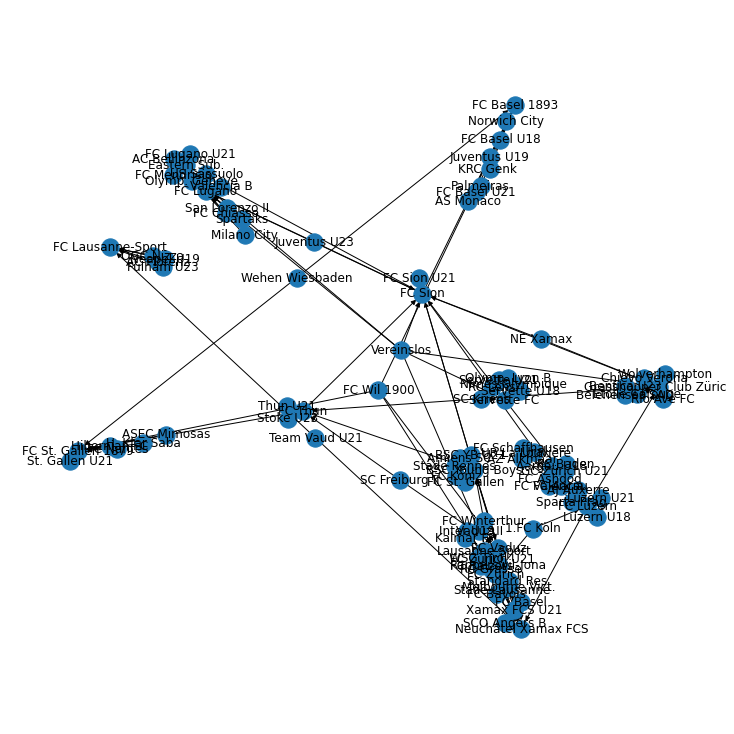

In [53]:
fig = plt.figure(figsize=(10, 10)) 
g = nx.from_pandas_edgelist(df_tempZ20, 
                            source = 'From',
                            target = 'To',
                            edge_attr = 'FromLanguage',
                            create_using = nx.DiGraph())
nx.draw(g, with_labels = True) 
plt.axis('equal') 
plt.show()
fig.savefig('network20.pdf')

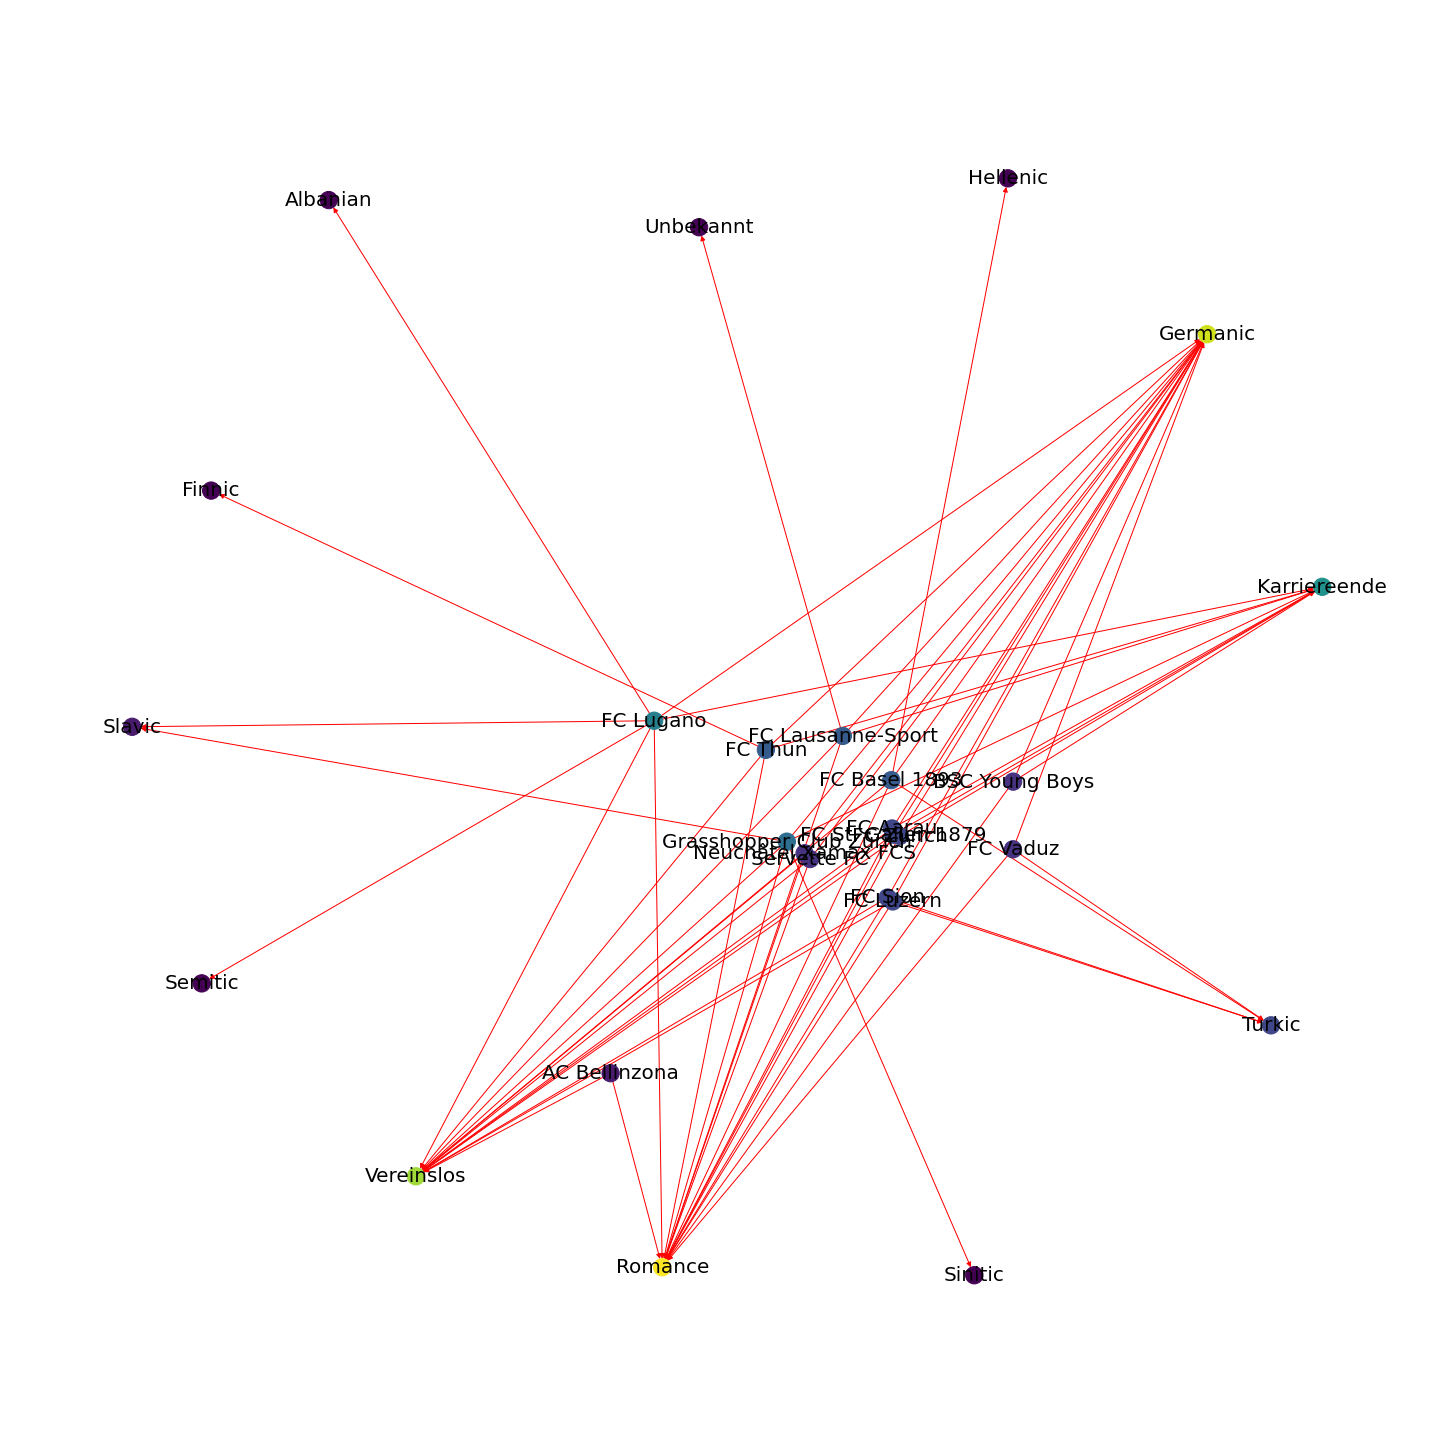

In [58]:
fig = plt.figure(figsize=(20, 20)) 

g = nx.from_pandas_edgelist(df_tempA20, 
                            source = 'From',
                            target = 'ToLanguageFamily',
                            edge_attr = 'FromLanguageFamily',
                            create_using = nx.DiGraph())
node_color = [20000.0 * g.degree(v) for v in g]
nx.draw(g, node_color=node_color, edge_color='red', with_labels = True, font_size=20) 
plt.axis('equal') 
plt.show()
fig.savefig('networkTestA20.pdf')

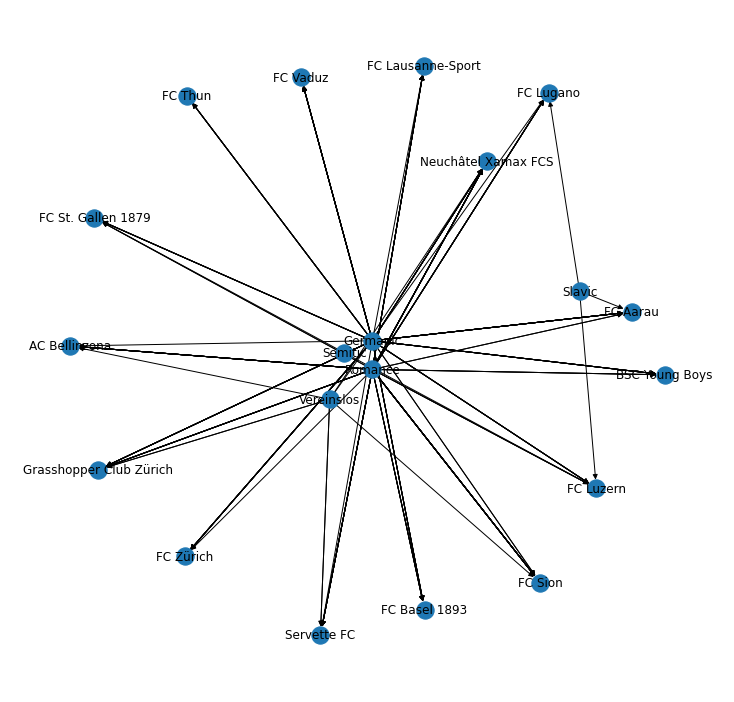

In [31]:
fig = plt.figure(figsize=(10, 10)) 
g = nx.from_pandas_edgelist(df_tempZ20, 
                            source = 'FromLanguageFamily',
                            target = 'To',
                            edge_attr = 'ToLanguageFamily',
                            create_using = nx.MultiDiGraph())
nx.draw(g, with_labels = True) 
plt.axis('scaled') 
plt.show()
fig.savefig('networkTestZ20.pdf')

In [76]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

[53, 41, 459, 301, 98]

(-1.0931331723928452,
 0.9557966202497482,
 -1.066841933131218,
 0.9987534612417222)

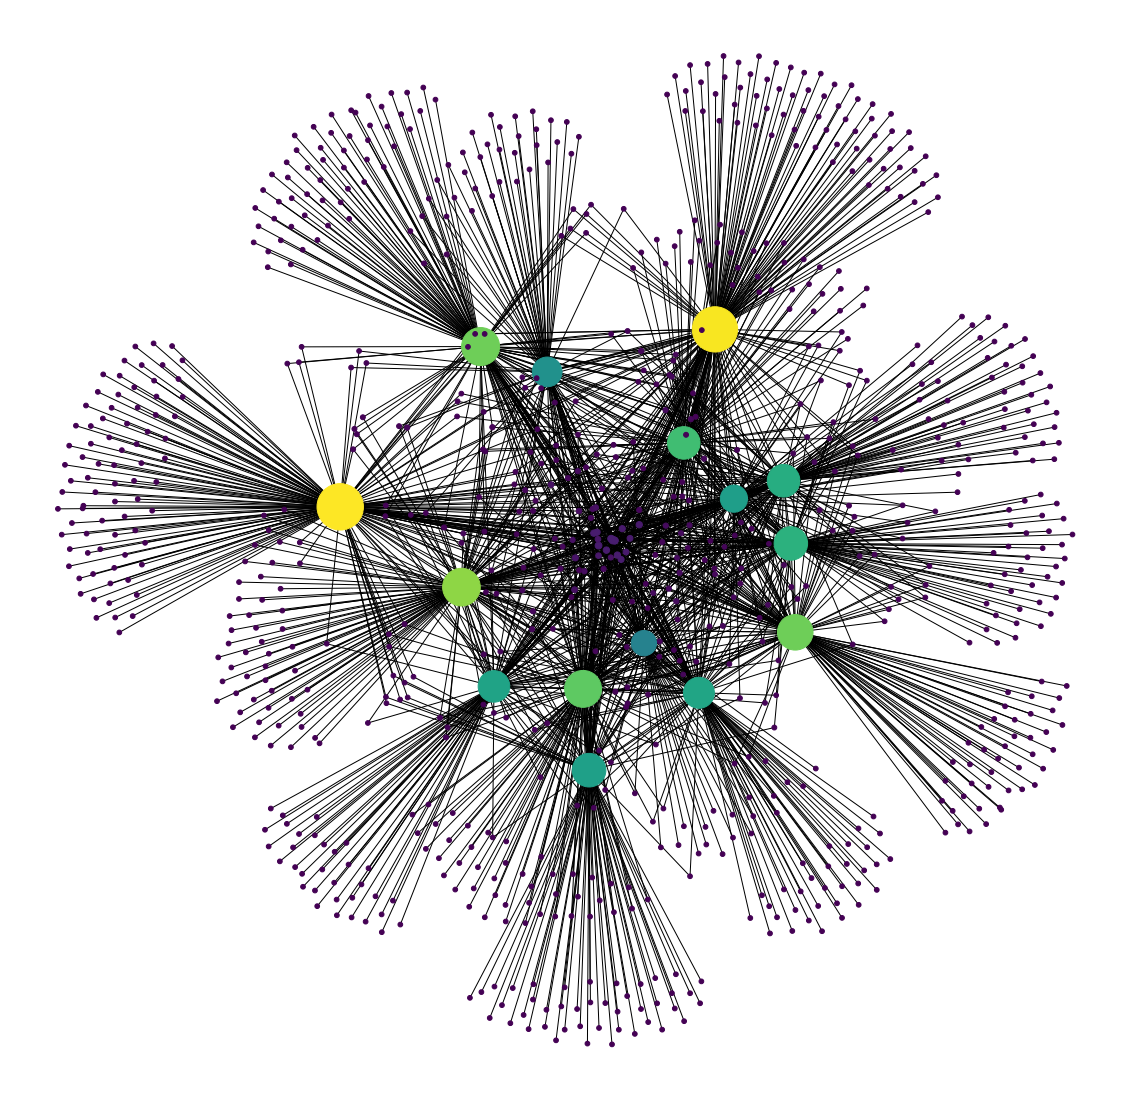

In [59]:
pos = nx.spring_layout(g)

betCent = nx.betweenness_centrality(g, normalized=True, endpoints=True)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize = (20,20))
nx.draw_networkx(g, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [49]:
 print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 904
Number of edges: 1700
Average degree:   3.7611
